In [10]:
#libraries
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [16]:
%cd /content/drive/My Drive/data/

/content/drive/My Drive/data


In [17]:
train_peptides = pd.read_csv("train_peptides.csv")
train_proteins = pd.read_csv("train_proteins.csv")
train_clinical = pd.read_csv("train_clinical_data.csv")
supp_clinical = pd.read_csv("supplemental_clinical_data.csv")

In [18]:
%cd /content/drive/My Drive/data/example_test_files

/content/drive/My Drive/data/example_test_files


In [19]:
sample_submission = pd.read_csv("sample_submission.csv")
test_peptides = pd.read_csv("test_peptides.csv")
test_clinical = pd.read_csv("test.csv")
test_proteins = pd.read_csv("test_proteins.csv")

**CLINICAL DATA**

In [ ]:
print(f'Unique patient ID: {train_clinical["patient_id"].nunique()}')
print("----------------------")
print('NaN values for each column')
print("----------------------")
for col in train_clinical.columns:
  print(f'NaN values in {col}: {train_clinical[col].isna().sum()}')

Unique patient ID: 248
----------------------
NaN values for each column
----------------------
NaN values in visit_id: 0
NaN values in patient_id: 0
NaN values in visit_month: 0
NaN values in updrs_1: 1
NaN values in updrs_2: 2
NaN values in updrs_3: 25
NaN values in updrs_4: 1038
NaN values in upd23b_clinical_state_on_medication: 1327


**PEPTIDE DATA**

In [ ]:
print(f'Unique patient ID: {train_peptides["patient_id"].nunique()}')
print("----------------------")
print(f'Unique UniProt ID: {train_peptides["UniProt"].nunique()}')
print("----------------------")
print(f'Unique Peptide ID: {train_peptides["Peptide"].nunique()}')
print("----------------------")
print("NaN values for each column")
print("----------------------")
for col in train_peptides.columns:
  print(f'NaN values in {col}: {train_peptides[col].isna().sum()}')

Unique patient ID: 248
----------------------
Unique UniProt ID: 227
----------------------
Unique Peptide ID: 968
----------------------
NaN values for each column
----------------------
NaN values in visit_id: 0
NaN values in visit_month: 0
NaN values in patient_id: 0
NaN values in UniProt: 0
NaN values in Peptide: 0
NaN values in PeptideAbundance: 0


**PROTEIN DATA**

* visit_id - ID code for the visit.
* visit_month - The month of the visit, relative to the first visit by the patient.
* patient_id - An ID code for the patient.
* UniProt - The UniProt ID code for the associated protein. There are often several peptides per protein.
* NPX - Normalized protein expression. The frequency of the protein's occurrence in the sample. May not have a 1:1 relationship with the component peptides as some proteins contain repeated copies of a given peptide.



In [ ]:
print(f'Unique patient ID: {train_proteins["patient_id"].nunique()}')
print("----------------------")
print(f'Unique UniProt ID: {train_proteins["UniProt"].nunique()}')
print("----------------------")
print('NaN values for each column')
print("----------------------")
for col in train_proteins.columns:
  print(f'NaN values in {col}: {train_proteins[col].isna().sum()}')

Unique patient ID: 248
----------------------
Unique UniProt ID: 227
----------------------
NaN values for each column
----------------------
NaN values in visit_id: 0
NaN values in visit_month: 0
NaN values in patient_id: 0
NaN values in UniProt: 0
NaN values in NPX: 0


**EDA**

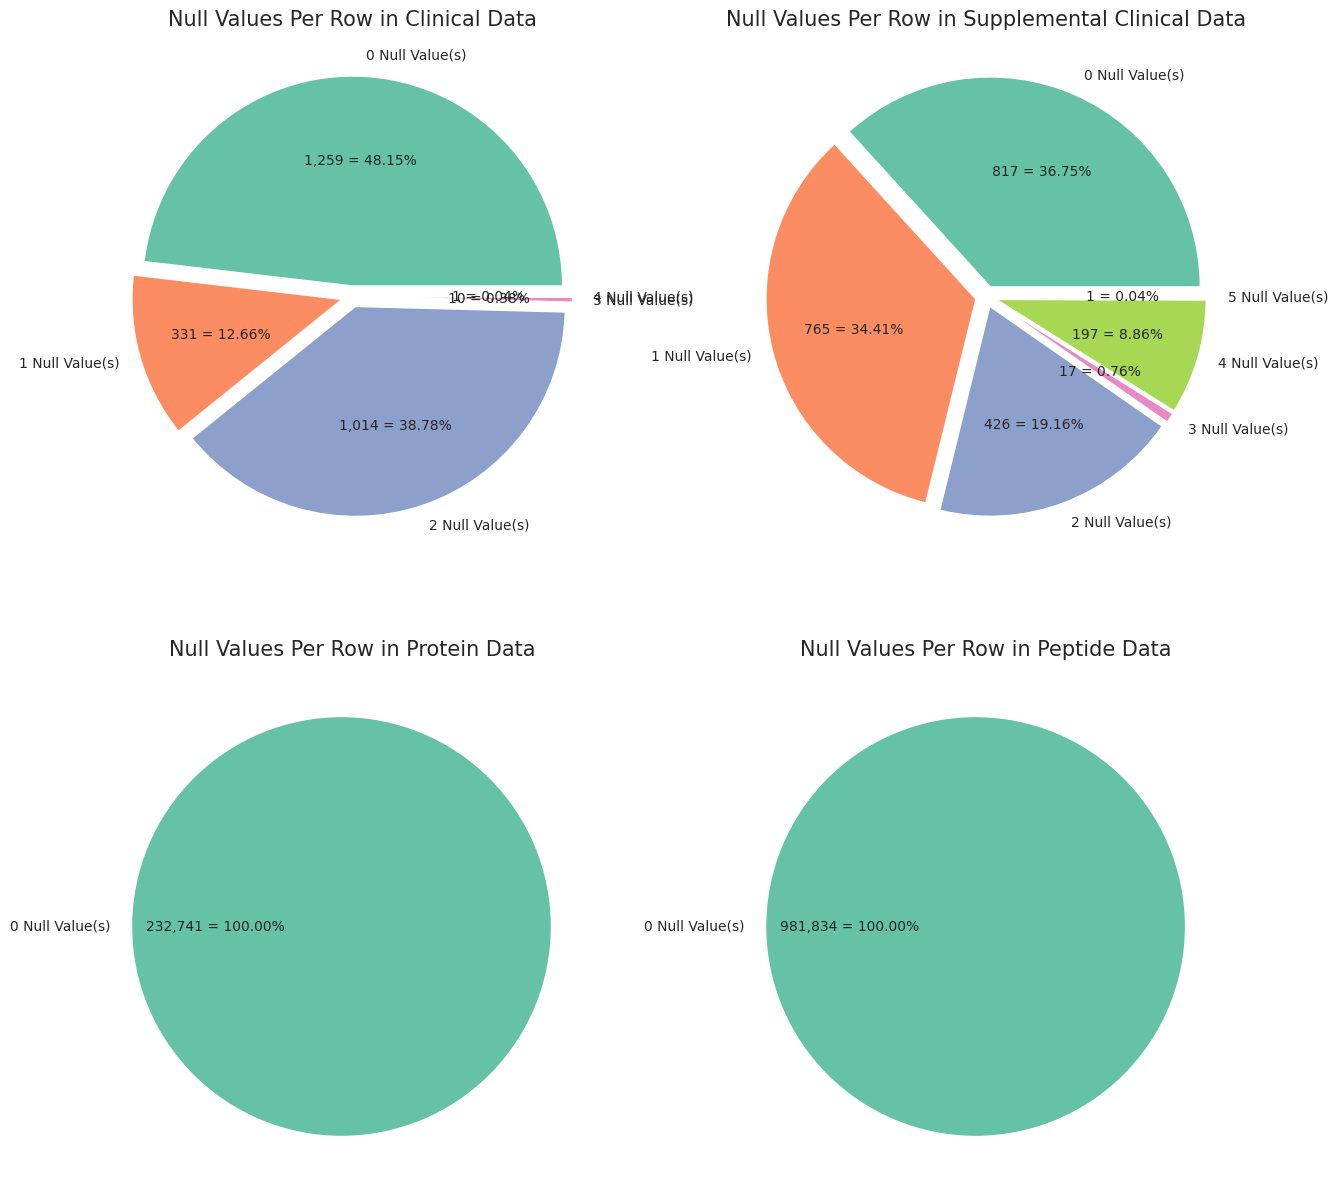

In [20]:
train_clinical["null_count"] = train_clinical.isnull().sum(axis=1)
counts_train_clinical = train_clinical.groupby("null_count")["visit_id"].count().to_dict()
null_train_clinical = {"{} Null Value(s)".format(k) : v for k, v in counts_train_clinical.items()}

train_peptides["null_count"] = train_peptides.isnull().sum(axis=1)
counts_train_peptides = train_peptides.groupby("null_count")["visit_id"].count().to_dict()
null_train_peptides = {"{} Null Value(s)".format(k) : v for k, v in counts_train_peptides.items()}

train_proteins["null_count"] = train_proteins.isnull().sum(axis=1)
counts_train_protiens = train_proteins.groupby("null_count")["visit_id"].count().to_dict()
null_train_protiens = {"{} Null Value(s)".format(k) : v for k, v in counts_train_protiens.items()}

supp_clinical["null_count"] = supp_clinical.isnull().sum(axis=1)
counts_supp_clinical = supp_clinical.groupby("null_count")["visit_id"].count().to_dict()
null_supp_clinical = {"{} Null Value(s)".format(k) : v for k, v in counts_supp_clinical.items()}

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

axs = axs.flatten()

_ = axs[0].pie(
    x=list(null_train_clinical.values()),
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_train_clinical.values())/100, x),
    explode=[0.05] * len(null_train_clinical.keys()),
    labels=null_train_clinical.keys(),
    colors=sns.color_palette("Set2")[0:len(null_train_clinical.keys())],
)
_ = axs[0].set_title("Null Values Per Row in Clinical Data", fontsize=15)

_ = axs[3].pie(
    x=list(null_train_peptides.values()),
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_train_peptides.values())/100, x),
    explode=[0.05] * len(null_train_peptides.keys()),
    labels=null_train_peptides.keys(),
    colors=sns.color_palette("Set2")[0:len(null_train_peptides.keys())],
)
_ = axs[3].set_title("Null Values Per Row in Peptide Data", fontsize=15)

_ = axs[2].pie(
    x=list(null_train_protiens.values()),
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_train_protiens.values())/100, x),
    explode=[0.05] * len(null_train_protiens.keys()),
    labels=null_train_protiens.keys(),
    colors=sns.color_palette("Set2")[0:len(null_train_protiens.keys())],
)
_ = axs[2].set_title("Null Values Per Row in Protein Data", fontsize=15)

_ = axs[1].pie(
    x=list(null_supp_clinical.values()),
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_supp_clinical.values())/100, x),
    explode=[0.05] * len(null_supp_clinical.keys()),
    labels=null_supp_clinical.keys(),
    colors=sns.color_palette("Set2")[0:len(null_supp_clinical.keys())],
)
_ = axs[1].set_title("Null Values Per Row in Supplemental Clinical Data", fontsize=15)

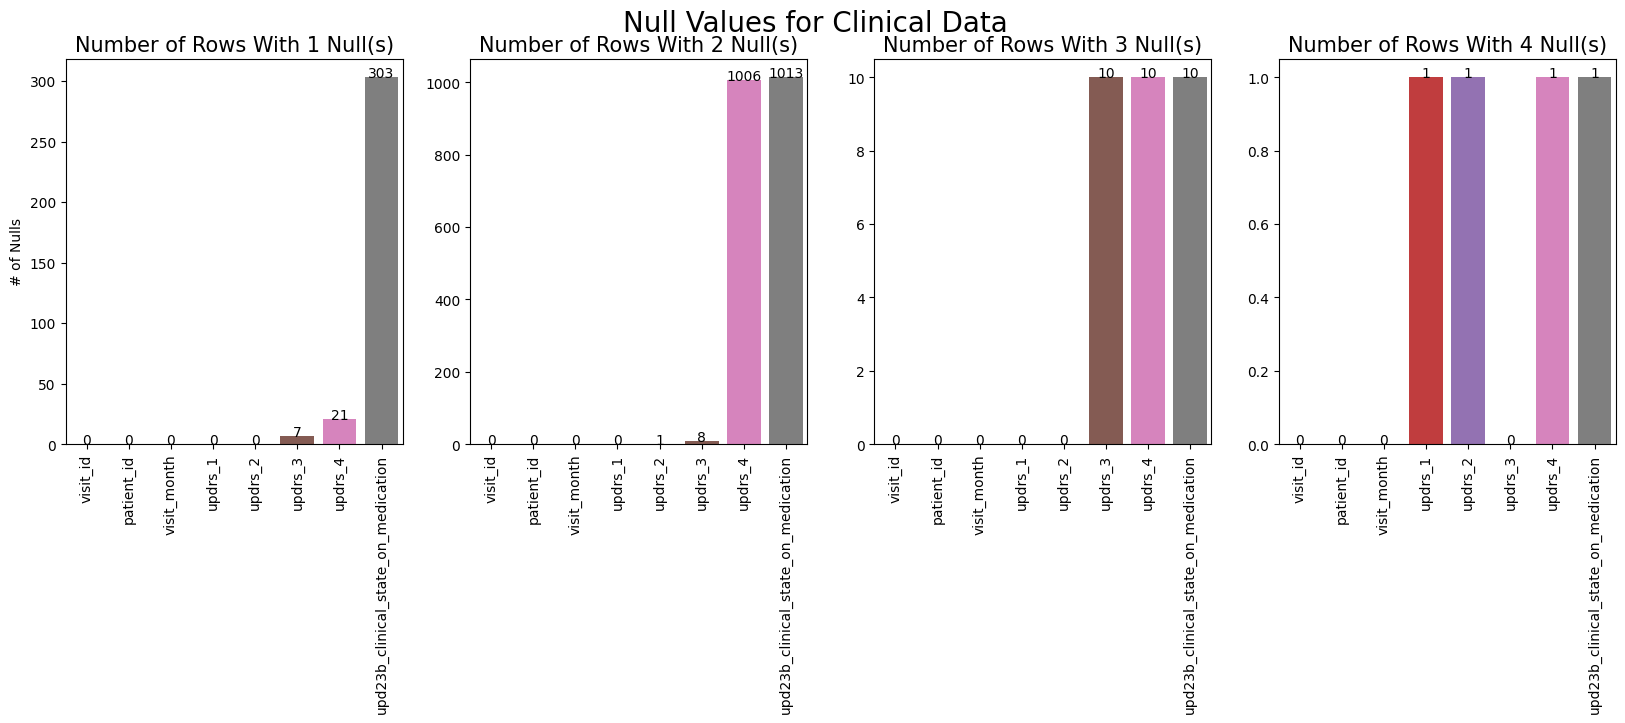

In [8]:
null_count_labels = [train_clinical[(train_clinical["null_count"] == x)].isnull().sum().index[:-1] for x in range(1, 6)]
null_count_values = [train_clinical[(train_clinical["null_count"] == x)].isnull().sum().values[:-1] for x in range(1, 6)]

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.suptitle("Null Values for Clinical Data", fontsize=20)

axs = axs.flatten()

for x in range(0, 4):
    ax = axs[x]
    labels = null_count_labels[x]
    _ = sns.barplot(x=labels, y=null_count_values[x], ax=ax)
    _ = ax.set_title("Number of Rows With {} Null(s)".format(x + 1), fontsize=15)
    _ = ax.set_ylabel("# of Nulls" if x == 0 else "")
    _ = ax.set_xlabel("")
    _ = ax.set_xticks([z for z in range(len(labels))], labels, rotation=90)
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x()+(p.get_width()/2), y=height, s="{:d}".format(int(height)), ha="center")

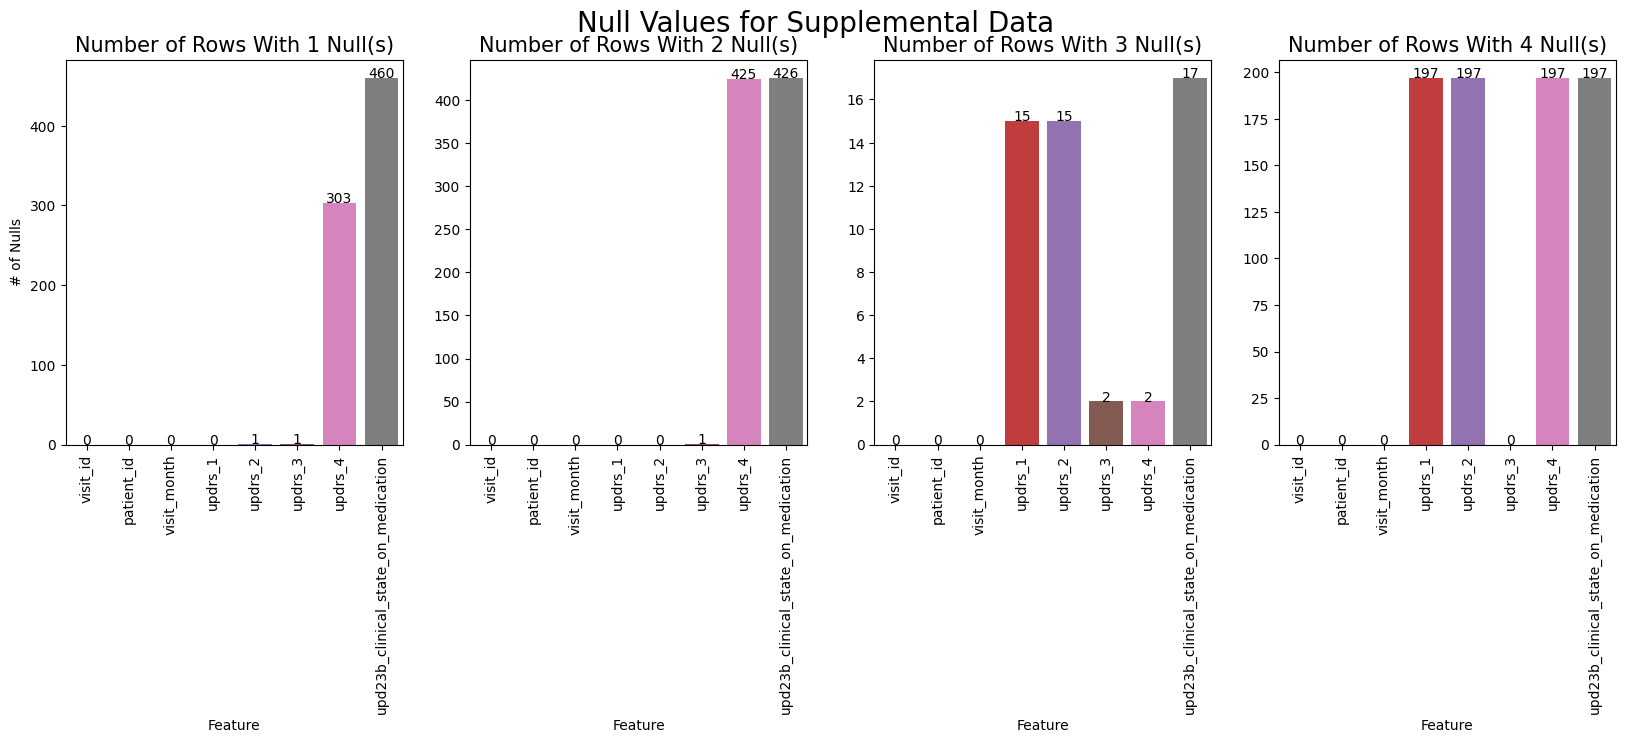

In [9]:
null_count_labels = [supp_clinical[(supp_clinical["null_count"] == x)].isnull().sum().index[:-1] for x in range(1, 6)]
null_count_values = [supp_clinical[(supp_clinical["null_count"] == x)].isnull().sum().values[:-1] for x in range(1, 6)]

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.suptitle("Null Values for Supplemental Data", fontsize=20)

axs = axs.flatten()

for x in range(0, 4):
    ax = axs[x]
    labels = null_count_labels[x]
    _ = sns.barplot(x=labels, y=null_count_values[x], ax=ax)
    _ = ax.set_title("Number of Rows With {} Null(s)".format(x + 1), fontsize=15)
    _ = ax.set_ylabel("# of Nulls" if x == 0 else "")
    _ = ax.set_xlabel("Feature")
    _ = ax.set_xticks([z for z in range(len(labels))], labels, rotation=90)
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x()+(p.get_width()/2), y=height, s="{:d}".format(int(height)), ha="center")

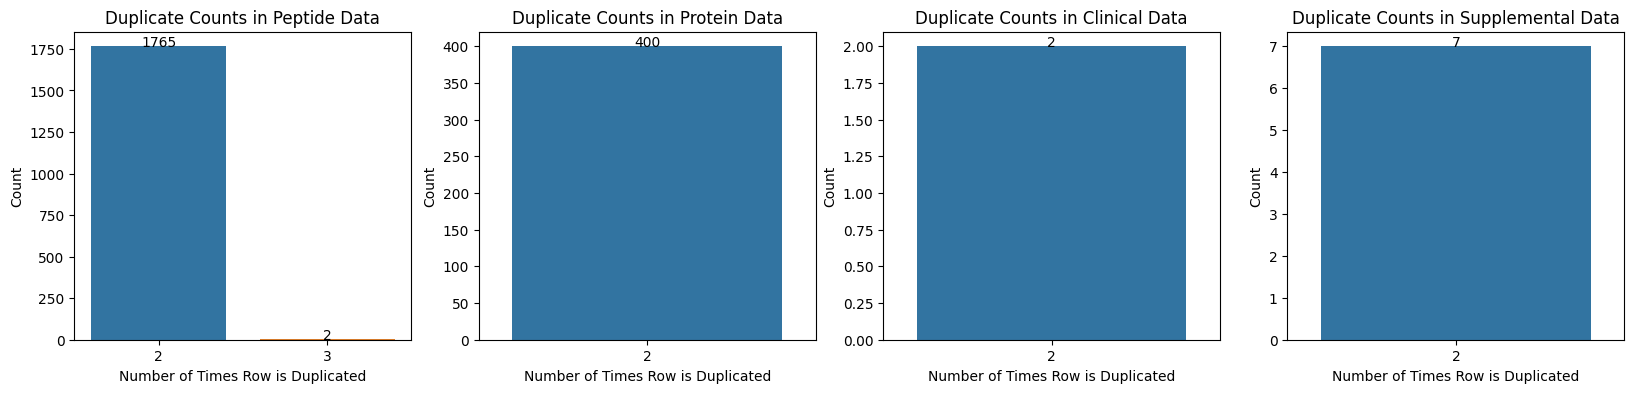

In [11]:
titles = ["Peptide Data", "Protein Data", "Clinical Data", "Supplemental Data"]
value_counts = []
duplicates = train_peptides.pivot_table(index=[
    'UniProt', 'Peptide', 'PeptideAbundance',
], aggfunc="size")
unique, counts = np.unique(duplicates, return_counts=True)
value_counts.append(dict(zip(unique, counts)))

duplicates = train_proteins.pivot_table(index=[
    'UniProt', 'NPX',
], aggfunc="size")
unique, counts = np.unique(duplicates, return_counts=True)
value_counts.append(dict(zip(unique, counts)))

duplicates = train_clinical.pivot_table(index=[
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication'
], aggfunc="size")
unique, counts = np.unique(duplicates, return_counts=True)
value_counts.append(dict(zip(unique, counts)))

duplicates = supp_clinical.pivot_table(index=[
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication'
], aggfunc="size")
unique, counts = np.unique(duplicates, return_counts=True)
value_counts.append(dict(zip(unique, counts)))

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

axs = axs.flatten()

for x in range(4):
    ax = axs[x]
    _ = sns.barplot(x=list(value_counts[x].keys())[1:], y=list(value_counts[x].values())[1:], ax=ax)
    _ = ax.set_title("Duplicate Counts in {}".format(titles[x], fontsize=15))
    _ = ax.set_ylabel("Count")
    _ = ax.set_xlabel("Number of Times Row is Duplicated")
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x()+(p.get_width()/2), y=height, s="{:d}".format(int(height)), ha="center")

In [12]:
features = [
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4',
]

train_clinical[features].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
visit_month,2615.000000,31.190822,25.199053,0.000000,10.500000,24.000000,48.000000,108.000000
updrs_1,2614.000000,7.110559,5.525955,0.000000,3.000000,6.000000,10.000000,33.000000
updrs_2,2613.000000,6.743590,6.323230,0.000000,1.000000,5.000000,10.000000,40.000000
updrs_3,2590.000000,19.421236,15.000289,0.000000,6.000000,19.000000,29.000000,86.000000
updrs_4,1577.000000,1.861763,3.022112,0.000000,0.000000,0.000000,3.000000,20.000000


<ipython-input-21-2350a52b2071>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  _ = sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)
<ipython-input-21-2350a52b2071>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  _ = sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)
<ipython-input-21-2350a52b2071>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  _ = sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)
<ipython-input-21-2350a52b2071>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  _ = sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)


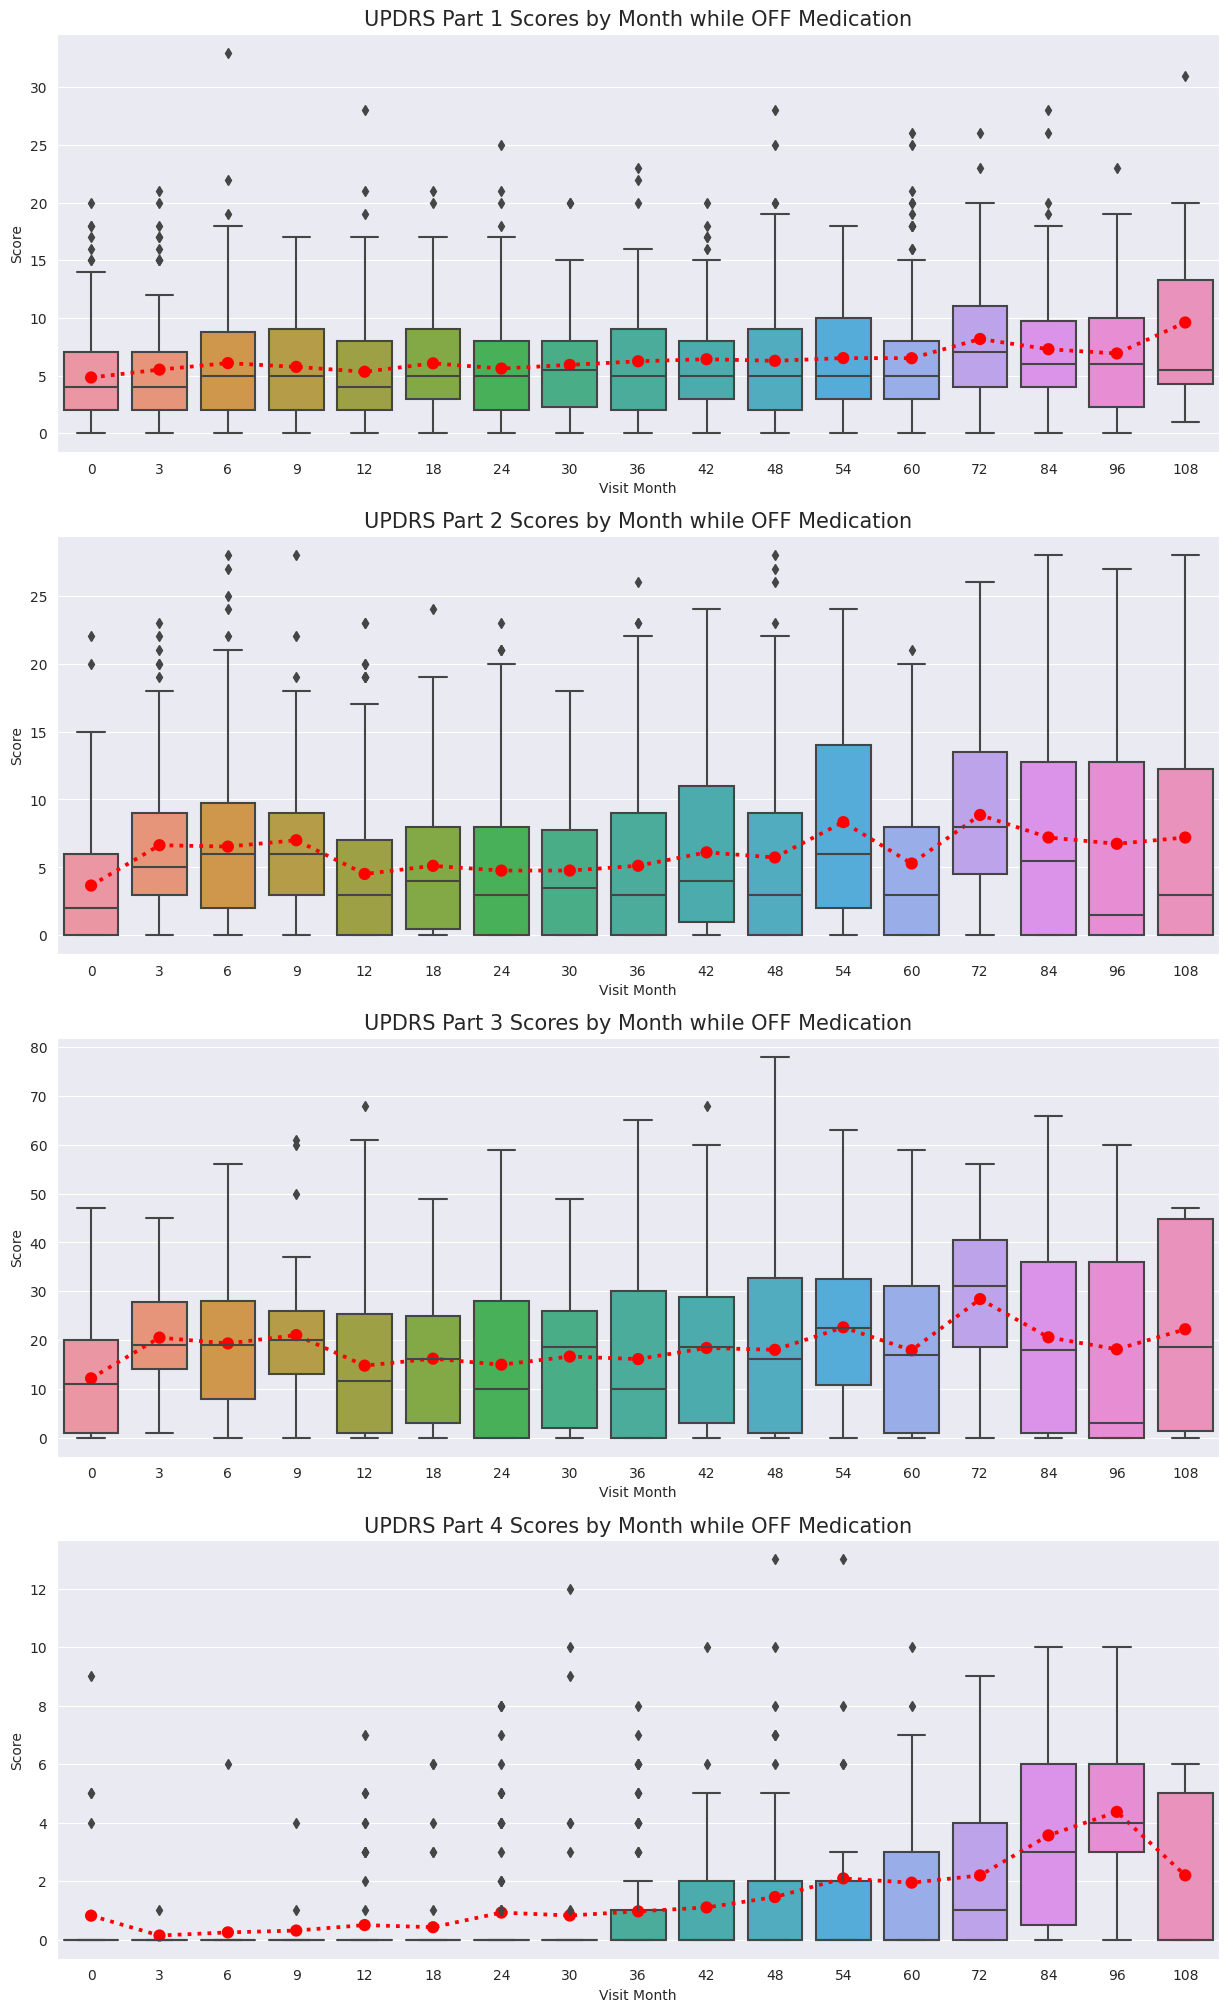

In [21]:
train_clinical_copy = train_clinical.copy()
train_clinical_copy["upd23b_clinical_state_on_medication"] = train_clinical_copy["upd23b_clinical_state_on_medication"].fillna("Off")

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))

sns.set_style('darkgrid')

axs = axs.flatten()

for x, feature in enumerate(["updrs_1", "updrs_2", "updrs_3", "updrs_4"]):
    ax = axs[x]
    data = train_clinical_copy[(train_clinical_copy["upd23b_clinical_state_on_medication"] == "Off")]
    _ = sns.boxplot(data=data, x="visit_month", y=feature, ax=ax)
    _ = sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)
    _ = ax.set_title("UPDRS Part {} Scores by Month while OFF Medication".format(x+1), fontsize=15)
    _ = ax.set_xlabel("Visit Month")
    _ = ax.set_ylabel("Score")

<ipython-input-22-a94e76830767>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  _ = sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)
<ipython-input-22-a94e76830767>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  _ = sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)
<ipython-input-22-a94e76830767>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  _ = sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)
<ipython-input-22-a94e76830767>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  _ = sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)


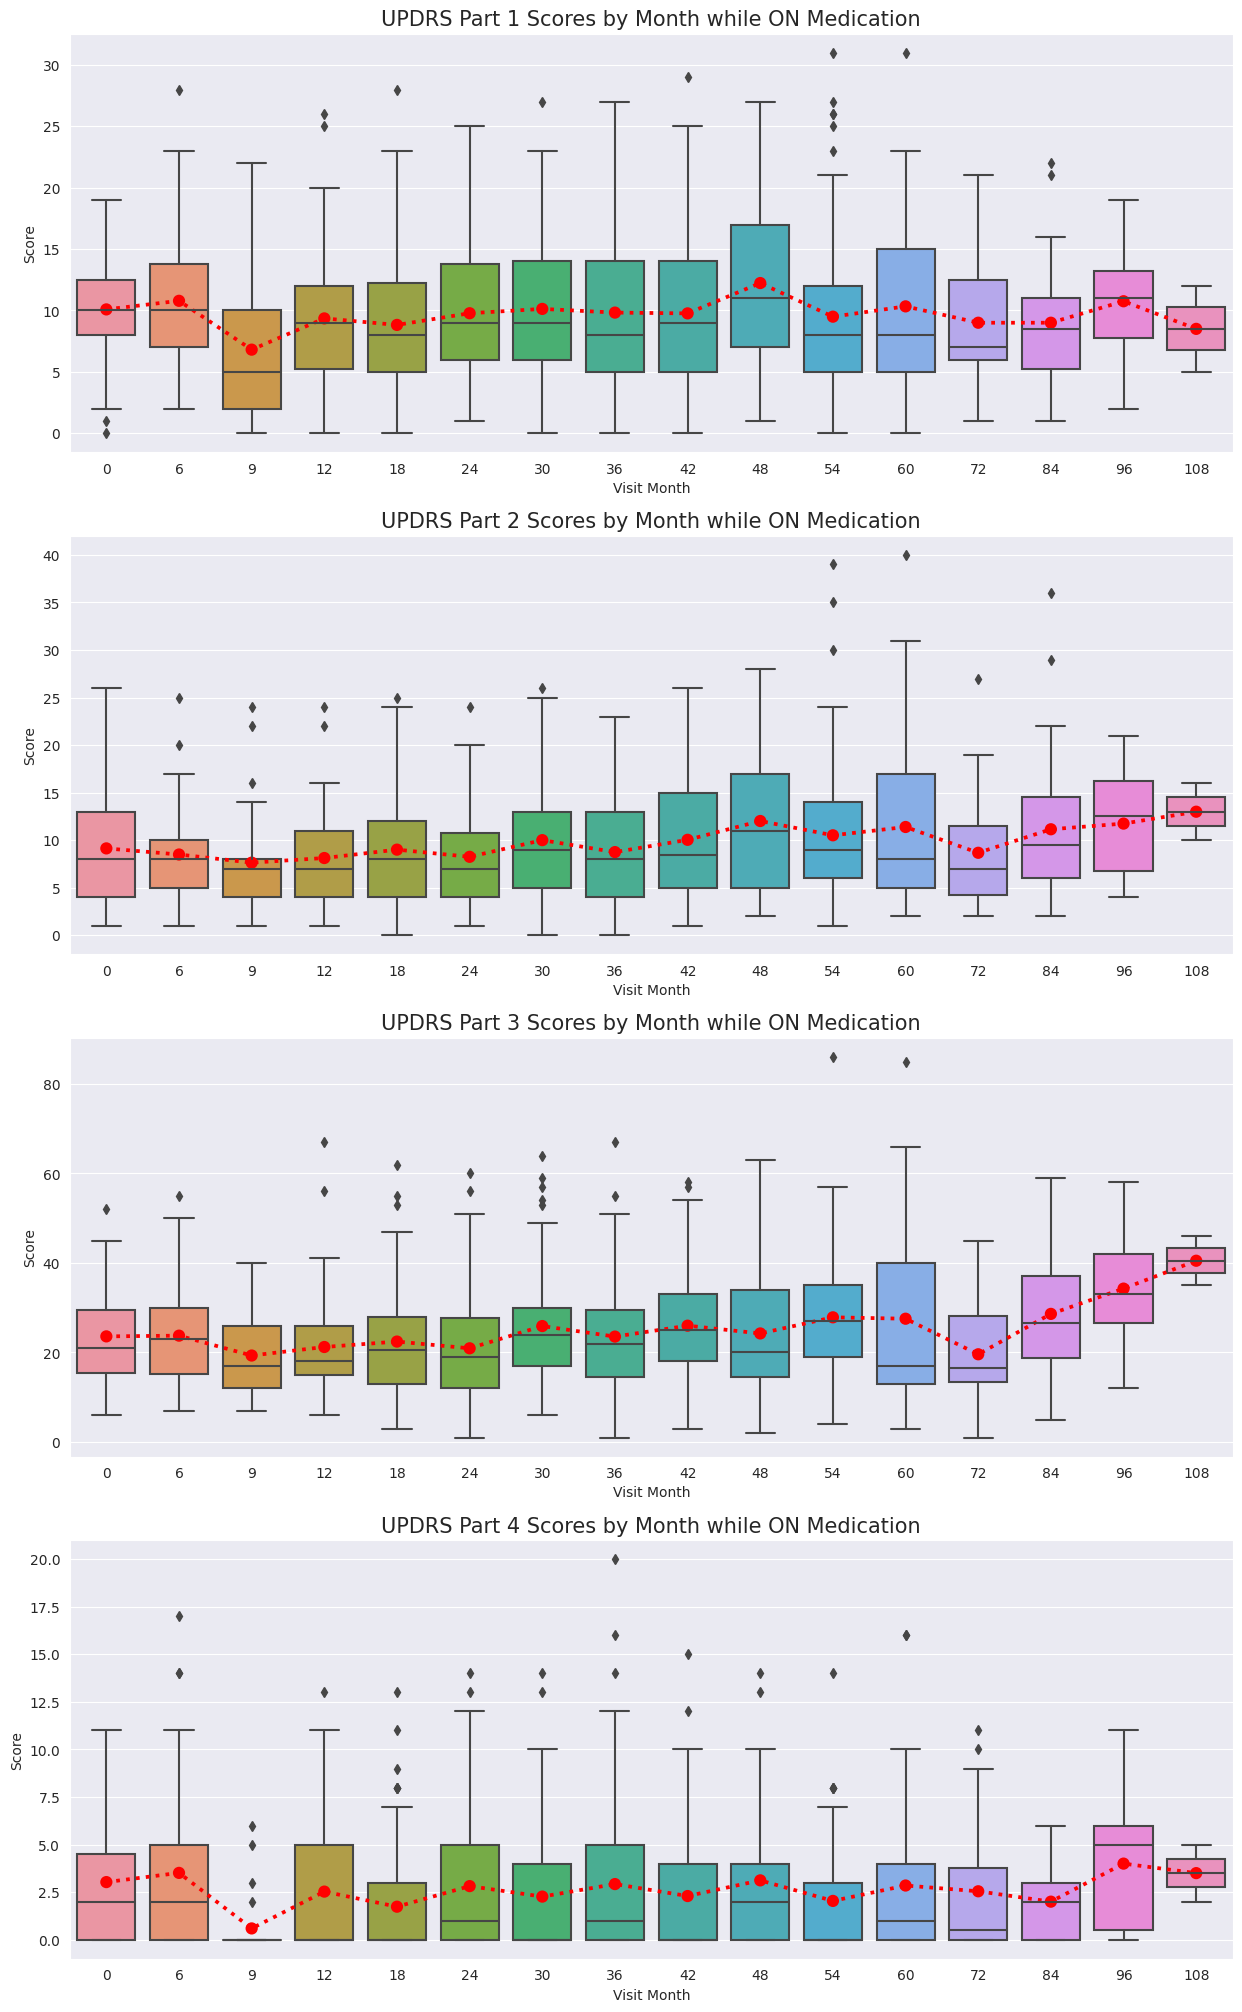

In [22]:
train_clinical_copy = train_clinical.copy()
train_clinical_copy["upd23b_clinical_state_on_medication"] = train_clinical_copy["upd23b_clinical_state_on_medication"].fillna("Off")

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))

sns.set_style('darkgrid')

axs = axs.flatten()

for x, feature in enumerate(["updrs_1", "updrs_2", "updrs_3", "updrs_4"]):
    ax = axs[x]
    data = train_clinical_copy[(train_clinical_copy["upd23b_clinical_state_on_medication"] == "On")]
    _ = sns.boxplot(data=data, x="visit_month", y=feature, ax=ax)
    _ = sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)
    _ = ax.set_title("UPDRS Part {} Scores by Month while ON Medication".format(x+1), fontsize=15)
    _ = ax.set_xlabel("Visit Month")
    _ = ax.set_ylabel("Score")

<ipython-input-24-cd38708cadad>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  _ = sns.pointplot(data=data, x="visit_month", y="updrs_sum", color="r", ci=None, linestyles=[":"], ax=ax)
<ipython-input-24-cd38708cadad>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  _ = sns.pointplot(data=data, x="visit_month", y="updrs_sum", color="r", ci=None, linestyles=[":"], ax=ax)


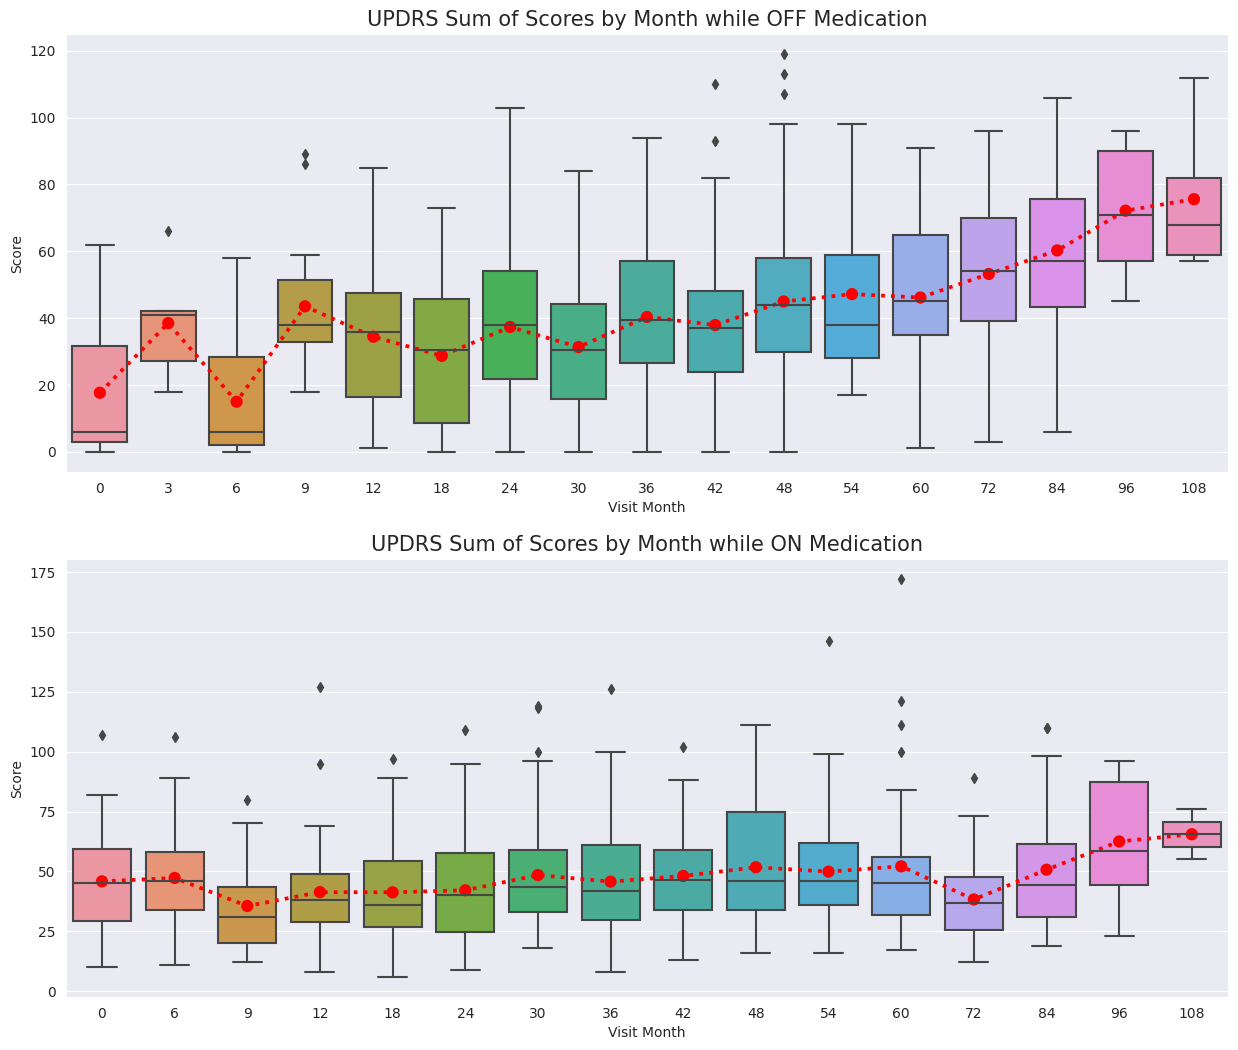

In [24]:
train_clinical["updrs_sum"] = train_clinical["updrs_1"] + train_clinical["updrs_2"] + train_clinical["updrs_3"] + train_clinical["updrs_4"]
train_clinical_copy = train_clinical.copy()
train_clinical_copy["upd23b_clinical_state_on_medication"] = train_clinical_copy["upd23b_clinical_state_on_medication"].fillna("Off")

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 12.5))

axs = axs.flatten()

sns.set_style('darkgrid')

data = train_clinical_copy[(train_clinical_copy["upd23b_clinical_state_on_medication"] == "Off")]
ax = axs[0]
_ = sns.boxplot(data=data, x="visit_month", y="updrs_sum", ax=ax)
_ = sns.pointplot(data=data, x="visit_month", y="updrs_sum", color="r", ci=None, linestyles=[":"], ax=ax)
_ = ax.set_title("UPDRS Sum of Scores by Month while OFF Medication".format(x+1), fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("Score")

data = train_clinical_copy[(train_clinical_copy["upd23b_clinical_state_on_medication"] == "On")]
ax = axs[1]
_ = sns.boxplot(data=data, x="visit_month", y="updrs_sum", ax=ax)
_ = sns.pointplot(data=data, x="visit_month", y="updrs_sum", color="r", ci=None, linestyles=[":"], ax=ax)
_ = ax.set_title("UPDRS Sum of Scores by Month while ON Medication".format(x+1), fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("Score")

<ipython-input-25-fd8f220d3f90>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  _ = sns.pointplot(data=train_clinical_copy, x="visit_month", y="updrs_sum", color="r", ci=None, linestyles=[":"], ax=ax)


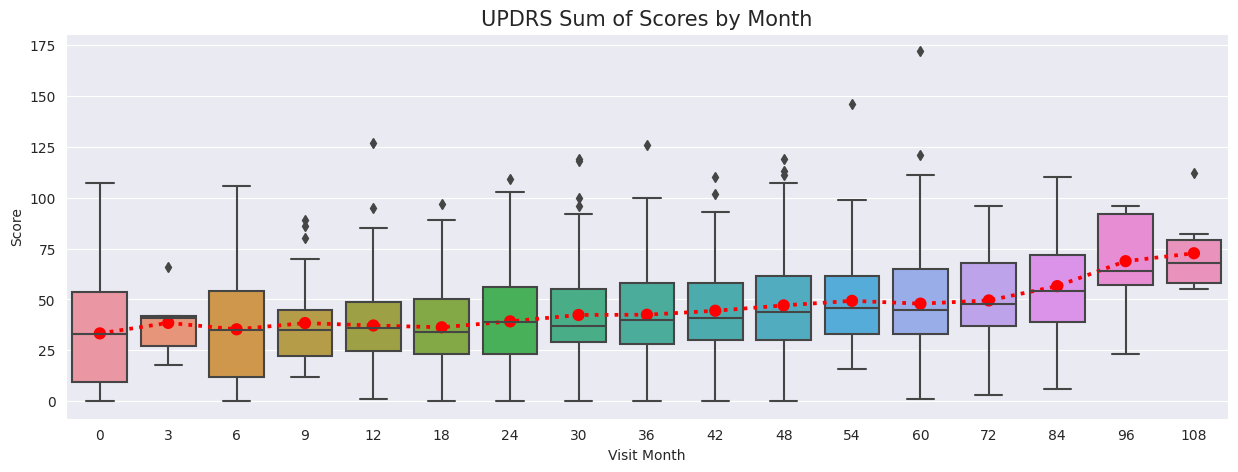

In [25]:
train_clinical["updrs_sum"] = train_clinical["updrs_1"] + train_clinical["updrs_2"] + train_clinical["updrs_3"] + train_clinical["updrs_4"]
train_clinical_copy = train_clinical.copy()
train_clinical_copy["upd23b_clinical_state_on_medication"] = train_clinical_copy["upd23b_clinical_state_on_medication"].fillna("Off")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.boxplot(data=train_clinical_copy, x="visit_month", y="updrs_sum", ax=ax)
_ = sns.pointplot(data=train_clinical_copy, x="visit_month", y="updrs_sum", color="r", ci=None, linestyles=[":"], ax=ax)
_ = ax.set_title("UPDRS Sum of Scores by Month", fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("Score")

**FREQUENCY OF UNIPROT IN PROTEIN DATA**

In [23]:
plt.figure(figsize = (200,50))
sns.histplot(x=train_proteins["UniProt"], stat='count',kde=True)
plt.xlabel("UniProt")
plt.ylabel("Count")
plt.show()

**MERGE DATA**

In [ ]:
merged_proteins_peptides = pd.merge(train_proteins, train_peptides, on = ['visit_id', 'visit_month', 'patient_id', 'UniProt'])

merged_df = pd.merge(merged_proteins_peptides, train_clinical, on = ['visit_id', 'visit_month', 'patient_id'])

merged_df

,visit_id,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.30,10.0,6.0,15.0,NaN,NaN
1,55_0,0,55,O00533,732430.0,GNPEPTFSWTK,102060.00,10.0,6.0,15.0,NaN,NaN
2,55_0,0,55,O00533,732430.0,IEIPSSVQQVPTIIK,174185.00,10.0,6.0,15.0,NaN,NaN
3,55_0,0,55,O00533,732430.0,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90,10.0,6.0,15.0,NaN,NaN
4,55_0,0,55,O00533,732430.0,SMEQNGPGLEYR,30838.70,10.0,6.0,15.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
941739,58648_108,108,58648,Q9UHG2,369437.0,ILAGSADSEGVAAPR,202820.00,6.0,0.0,0.0,NaN,NaN
941740,58648_108,108,58648,Q9UKV8,105830.0,SGNIPAGTTVDTK,105830.00,6.0,0.0,0.0,NaN,NaN
941741,58648_108,108,58648,Q9Y646,21257.6,LALLVDTVGPR,21257.60,6.0,0.0,0.0,NaN,NaN
941742,58648_108,108,58648,Q9Y6R7,17953.1,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26,6.0,0.0,0.0,NaN,NaN


**PIVOT DATA**

In [ ]:
pivoted_df = merged_df.pivot(index = 'visit_id', columns = ['Peptide'], values = 'PeptideAbundance')

pivoted_df

Peptide,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,ADDKETC(UniMod_4)FAEEGK,ADDKETC(UniMod_4)FAEEGKK,ADDLGKGGNEESTKTGNAGSR,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,6580710.0,31204.4,7735070.0,NaN,NaN,NaN,46620.3,236144.0,NaN,NaN,...,202274.0,NaN,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,NaN,7207.30
10053_12,6333510.0,52277.6,5394390.0,NaN,NaN,NaN,57554.5,108298.0,45885.4,NaN,...,201009.0,NaN,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,7129640.0,61522.0,7011920.0,35984.7,17188.00,19787.3,36029.4,708729.0,5067790.0,30838.2,...,220728.0,NaN,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,7404780.0,46107.2,10610900.0,NaN,20910.20,66662.3,55253.9,79575.5,6201210.0,26720.0,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,13788300.0,56910.3,6906160.0,13785.5,11004.20,63672.7,36819.8,34160.9,2117430.0,15645.2,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,NaN,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,6312970.0,44462.7,12455000.0,11051.3,1163.18,43279.8,67743.5,325328.0,4666550.0,11038.5,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
942_12,11289900.0,46111.7,11297300.0,NaN,13894.10,53755.0,40289.3,565112.0,NaN,26495.8,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,NaN
942_24,10161900.0,32145.0,12388000.0,25869.2,17341.80,48625.5,45223.9,84448.0,4684800.0,23150.2,...,185428.0,5554.53,NaN,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60


**FINAL DATAFRAME FOR WORK**

In [ ]:
final_df = pd.merge(train_clinical, pivoted_df, on = 'visit_id', how = 'right').set_index('visit_id')

final_df

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,10053,0,3.0,0.0,13.0,0.0,NaN,6580710.0,31204.4,7735070.0,...,202274.0,NaN,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,NaN,7207.30
10053_12,10053,12,4.0,2.0,8.0,0.0,NaN,6333510.0,52277.6,5394390.0,...,201009.0,NaN,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,10053,18,2.0,2.0,0.0,0.0,NaN,7129640.0,61522.0,7011920.0,...,220728.0,NaN,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,10138,12,3.0,6.0,31.0,0.0,On,7404780.0,46107.2,10610900.0,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,10138,24,4.0,7.0,19.0,10.0,On,13788300.0,56910.3,6906160.0,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,NaN,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,8699,24,11.0,10.0,13.0,2.0,On,6312970.0,44462.7,12455000.0,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
942_12,942,12,5.0,2.0,25.0,0.0,NaN,11289900.0,46111.7,11297300.0,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,NaN
942_24,942,24,2.0,3.0,23.0,NaN,NaN,10161900.0,32145.0,12388000.0,...,185428.0,5554.53,NaN,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60


In [ ]:
final_df.insert(6, 'visit_month', final_df.pop('visit_month'))

final_df

,patient_id,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,visit_month,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,10053,3.0,0.0,13.0,0.0,NaN,0,6580710.0,31204.4,7735070.0,...,202274.0,NaN,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,NaN,7207.30
10053_12,10053,4.0,2.0,8.0,0.0,NaN,12,6333510.0,52277.6,5394390.0,...,201009.0,NaN,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,10053,2.0,2.0,0.0,0.0,NaN,18,7129640.0,61522.0,7011920.0,...,220728.0,NaN,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,10138,3.0,6.0,31.0,0.0,On,12,7404780.0,46107.2,10610900.0,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,10138,4.0,7.0,19.0,10.0,On,24,13788300.0,56910.3,6906160.0,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,NaN,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,8699,11.0,10.0,13.0,2.0,On,24,6312970.0,44462.7,12455000.0,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
942_12,942,5.0,2.0,25.0,0.0,NaN,12,11289900.0,46111.7,11297300.0,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,NaN
942_24,942,2.0,3.0,23.0,NaN,NaN,24,10161900.0,32145.0,12388000.0,...,185428.0,5554.53,NaN,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60


In [ ]:
final_df = final_df.drop('patient_id', axis = 1)

final_df

,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,visit_month,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,3.0,0.0,13.0,0.0,NaN,0,6580710.0,31204.4,7735070.0,NaN,...,202274.0,NaN,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,NaN,7207.30
10053_12,4.0,2.0,8.0,0.0,NaN,12,6333510.0,52277.6,5394390.0,NaN,...,201009.0,NaN,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,2.0,2.0,0.0,0.0,NaN,18,7129640.0,61522.0,7011920.0,35984.7,...,220728.0,NaN,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,3.0,6.0,31.0,0.0,On,12,7404780.0,46107.2,10610900.0,NaN,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,4.0,7.0,19.0,10.0,On,24,13788300.0,56910.3,6906160.0,13785.5,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,NaN,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,11.0,10.0,13.0,2.0,On,24,6312970.0,44462.7,12455000.0,11051.3,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
942_12,5.0,2.0,25.0,0.0,NaN,12,11289900.0,46111.7,11297300.0,NaN,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,NaN
942_24,2.0,3.0,23.0,NaN,NaN,24,10161900.0,32145.0,12388000.0,25869.2,...,185428.0,5554.53,NaN,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60


In [ ]:
#final_df.loc[:, 'AADDTWEPFASGK':] = final_df.loc[:, 'AADDTWEPFASGK':].fillna(0)

#final_df.loc[:, 'updrs_1':] = final_df.loc[:, 'updrs_1':].fillna(0)

final_df.dropna(inplace = True)

final_df

NameError: ignored

In [ ]:
final_df = final_df.drop('upd23b_clinical_state_on_medication', axis = 1)

final_df

,updrs_1,updrs_2,updrs_3,updrs_4,visit_month,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,3.0,0.0,13.0,0.0,0,6580710.0,31204.4,7735070.0,0.0,0.00,...,202274.0,0.00,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,0.0,7207.30
10053_12,4.0,2.0,8.0,0.0,12,6333510.0,52277.6,5394390.0,0.0,0.00,...,201009.0,0.00,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,2.0,2.0,0.0,0.0,18,7129640.0,61522.0,7011920.0,35984.7,17188.00,...,220728.0,0.00,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,3.0,6.0,31.0,0.0,12,7404780.0,46107.2,10610900.0,0.0,20910.20,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,4.0,7.0,19.0,10.0,24,13788300.0,56910.3,6906160.0,13785.5,11004.20,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,0.0,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,11.0,10.0,13.0,2.0,24,6312970.0,44462.7,12455000.0,11051.3,1163.18,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
942_12,5.0,2.0,25.0,0.0,12,11289900.0,46111.7,11297300.0,0.0,13894.10,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,0.00
942_24,2.0,3.0,23.0,0.0,24,10161900.0,32145.0,12388000.0,25869.2,17341.80,...,185428.0,5554.53,0.0,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60
